<a href="https://www.kaggle.com/code/nikhil1e9/enzyme-substrate-multi-label?scriptVersionId=150554287" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('darkgrid')

In [2]:
# Get paths of all the files provided
for dirname, _, filenames in os.walk('/kaggle/input'):
    file_paths = []
    for filename in filenames:
        file_paths.append(os.path.join(dirname, filename))
file_paths

['/kaggle/input/playground-series-s3e18/sample_submission.csv',
 '/kaggle/input/playground-series-s3e18/train.csv',
 '/kaggle/input/playground-series-s3e18/test.csv']

In [3]:
submission, train, test = file_paths

In [4]:
train_data = pd.read_csv(train)
train_data.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [5]:
train_data.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

Training data contains 38 columns. We have to predict EC1 and EC2 among (EC1-EC6), so we can drop rest of the columns and also the id column needs to be dropped as it doesn't provide any information for prediction.

In [6]:
train_data.drop(['id', 'EC3', 'EC4', 'EC5', 'EC6'], axis=1, inplace=True)
train_data.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0


Let's now look at missing values in the data

In [7]:
train_data.isnull().sum().sum()

0

There are no missing values. This makes our data cleaning process a bit easier.

In [8]:
train_data.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,...,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,...,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,...,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,...,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,...,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,...,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000


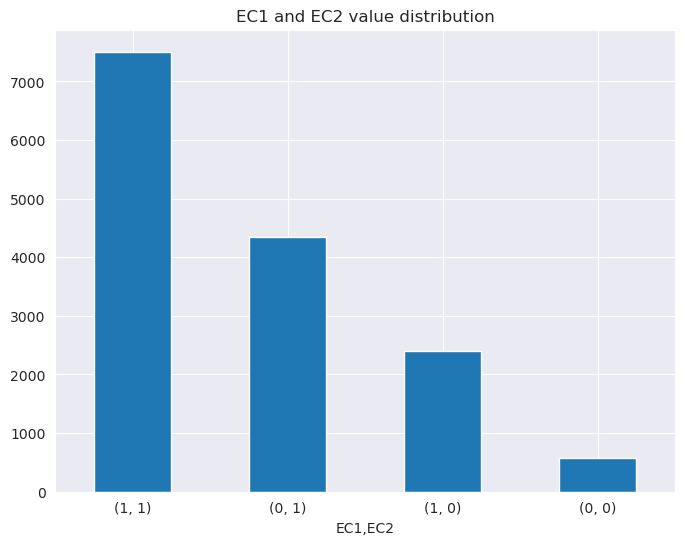

In [9]:
plt.figure(figsize=(8,6))
train_data[['EC1', 'EC2']].value_counts().plot(kind='bar',title='EC1 and EC2 value distribution', rot=0);

<Figure size 400x400 with 0 Axes>

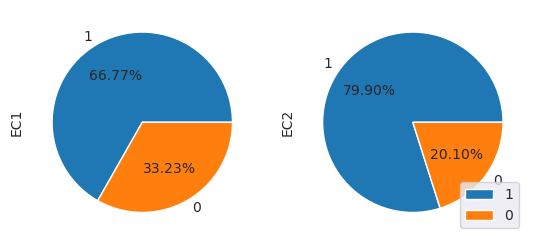

In [10]:
plt.figure(figsize=(4,4))
fig, ax = plt.subplots(1,2)
train_data['EC1'].value_counts().plot(kind='pie', autopct='%0.2f%%', ax=ax[0])
plt.legend()
train_data['EC2'].value_counts().plot(kind='pie', autopct='%0.2f%%', ax=ax[1])
plt.legend()

EC2 has more 1s than EC1. This could be a valuable insight.

In [11]:
features = [x for x in train_data.columns if x not in ['EC1', 'EC2']]

## Distribution for EC1 and EC2 for different features

CPU times: user 2min 42s, sys: 21.3 s, total: 3min 3s
Wall time: 2min 31s


Text(0.5, 0.98, 'Analyzing Data Distribution on target variables')

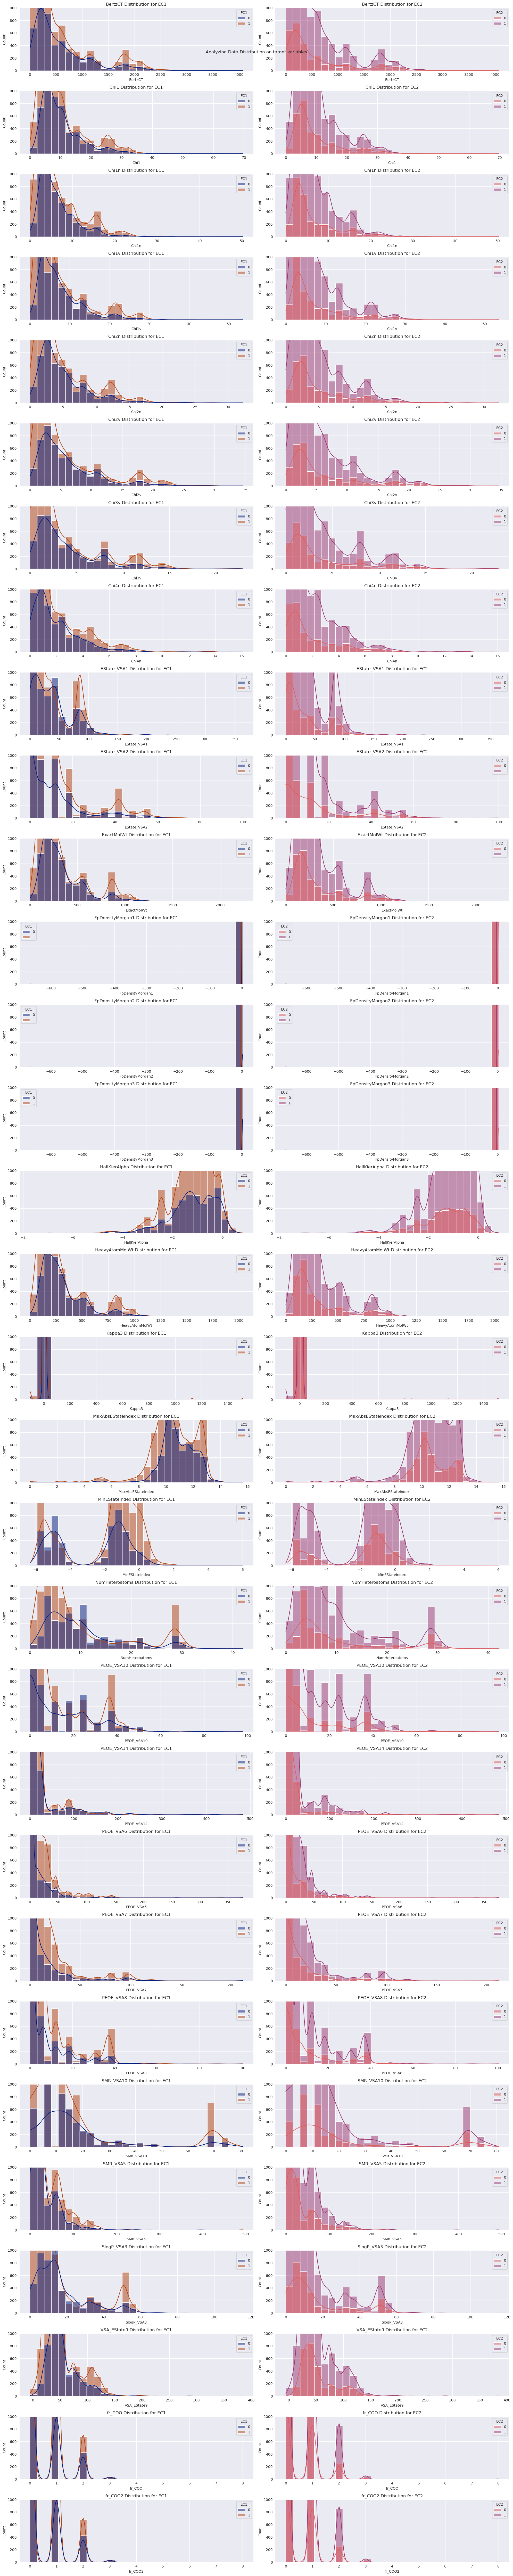

In [12]:
%%time
plt.figure(figsize=(20,100))

for i ,col in enumerate(features):
    # Plotting for 'EC1'
    plt.subplot(31,2,i*2+1)
    sns.histplot(x=col, hue="EC1", data=train_data, bins=30, kde=True, palette="dark")
    plt.title(f"{col} Distribution for EC1")
    plt.ylim(0,1000)
    plt.tight_layout()
    
    # Plotting for 'EC2'
    plt.subplot(31,2,i*2+2)
    sns.histplot(x=col, hue="EC2", data=train_data, bins=30, kde=True, palette="flare")
    plt.title(f"{col} Distribution for EC2")
    plt.ylim(0,1000)
    plt.tight_layout()
plt.suptitle("Analyzing Data Distribution on target variables")

EC1 has more closely linked distributions for 0 and 1 values whereas those distributions look quite separated for EC2. This means it is easier to predict the correct value for EC2 as compared to EC1

Let's build some models now

## Building models

This is a multi-label prediction task. Therefore we have to predict EC1 and EC2 separately. It would be good to make separate data for each of them for easier model training process.

In [13]:
X = train_data.drop(['EC1', 'EC2'], axis=1)
y = train_data[['EC1','EC2']]

In [14]:
y.head()

,EC1,EC2
0,1,1
1,0,1
2,1,1
3,1,1
4,1,0


I am skipping the feature engineering part for now to just get the baseline models. I will be exploring XGBoost and CatBoost in this notebook.

In [15]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=51)

In [17]:
xgb_params = {'n_estimators': 100,
              'tree_method': 'hist',
              'max_depth': 4,
              'reg_alpha': 0.08,
              'reg_lambda': 0.04,
              'min_child_weight': 2,
              #'gamma': 2.5705812096617772e-05,
              'learning_rate': 0.15,
              #'colsample_bytree': 0.1166,
              #'colsample_bynode': 0.99,
              'colsample_bylevel': 0.3,
              'subsample': 0.74,
              'random_state': 42
              }

In [18]:
targets = ['EC1', 'EC2']
cat = CatBoostClassifier(max_depth=4, verbose=False)
xgb = XGBClassifier(**xgb_params)
cat_predictions = []
xgb_predictions = []
for target in targets:
    cat.fit(X_train, y_train[target])
    xgb.fit(X_train, y_train[target])
    cat_preds = cat.predict_proba(X_val)[:,1]
    xgb_preds = xgb.predict_proba(X_val)[:,1]
    cat_predictions.append(cat_preds)
    xgb_predictions.append(xgb_preds)

In [19]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

EC1: 0.697836431603657
EC2: 0.5599861205529119


Text(0.5, 0.98, 'CatBoost AUC')

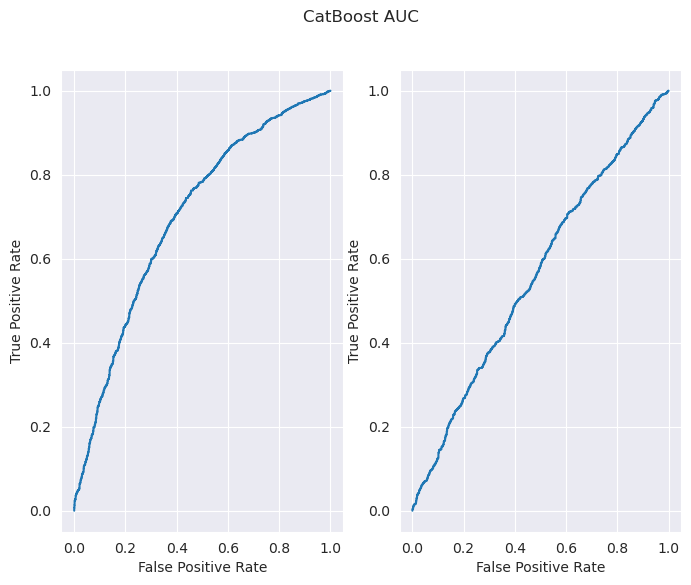

In [20]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_roc_curve(y_val[targets[0]], cat_predictions[0])
print("EC1:", roc_auc_score(y_val[targets[0]], cat_predictions[0]))
plt.subplot(1,2,2)
plot_roc_curve(y_val[targets[1]], cat_predictions[1])
print("EC2:", roc_auc_score(y_val[targets[1]], cat_predictions[1]))
plt.suptitle("CatBoost AUC")

In [21]:
EC1: 0.7011934688062973
EC2: 0.5674815088233629

EC1: 0.6939739378751524
EC2: 0.556762557004872


Text(0.5, 0.98, 'XGBoost AUC')

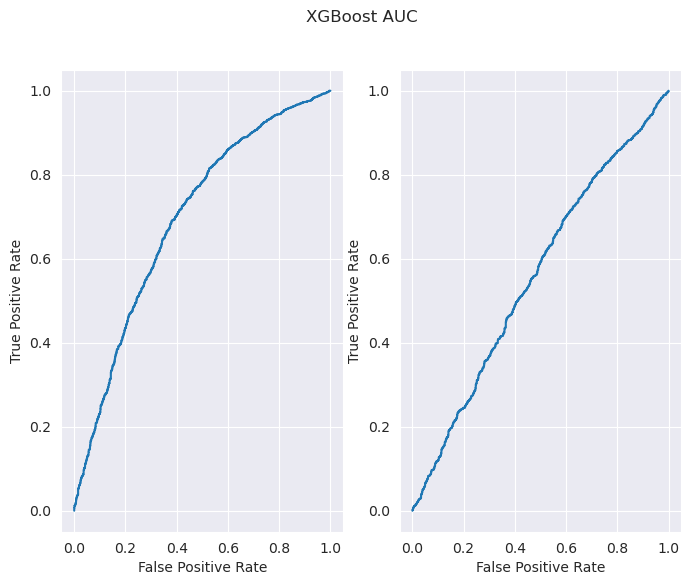

In [22]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_roc_curve(y_val[targets[0]], xgb_predictions[0])
print("EC1:", roc_auc_score(y_val[targets[0]], xgb_predictions[0]))
plt.subplot(1,2,2)
plot_roc_curve(y_val[targets[1]], xgb_predictions[1])
print("EC2:", roc_auc_score(y_val[targets[1]], xgb_predictions[1]))
plt.suptitle("XGBoost AUC")

## Making predictions with test data

In [23]:
test_data = pd.read_csv(test)
test_data.drop('id', axis=1, inplace=True)

In [24]:
final = XGBClassifier(**xgb_params)
final_preds = []
for target in targets:
    final.fit(X, y[target])
    preds = final.predict_proba(test_data)[:,1]
    final_preds.append(preds)

In [25]:
submission_file = pd.read_csv(submission)
submission_file.shape

(9893, 3)

In [26]:
submission_file[['EC1', 'EC2']] = pd.DataFrame(final_preds).T

In [27]:
submission_file.to_csv("submission_latest.csv", index=False)